# EDA: total population by country

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [4]:
pd.options.display.float_format = '{:,.0f}'.format

In [5]:
import warnings

def disable_pandas_warnings():
    warnings.resetwarnings()  # Maybe somebody else is messing with the warnings system?
    warnings.filterwarnings('ignore')  # Ignore everything
    # ignore everything does not work: ignore specific messages, using regex
    warnings.filterwarnings('ignore', '.*A value is trying to be set on a copy of a slice from a DataFrame.*')
    warnings.filterwarnings('ignore', '.indexing past lexsort depth may impact performance')
disable_pandas_warnings()

In [6]:
df = pd.read_csv('dataSetsEDA\\countries\\countries_population.csv')

In [8]:
df.head()

,country_name,country_code,population_1990,population_1991,population_1992,population_1993,population_1994,population_1995,population_1996,population_1997,...,population_2011,population_2012,population_2013,population_2014,population_2015,population_2016,population_2017,population_2018,population_2019,population_2020
0,ARUBA,ABW,"65,712","67,864","70,192","72,360","74,710","77,050","79,417","81,858",...,"101,288","102,112","102,880","103,594","104,257","104,874","105,439","105,962","106,442","106,585"
1,AFGHANISTAN,AFG,"10,694,796","10,745,167","12,057,433","14,003,760","15,455,555","16,418,912","17,106,595","17,788,819",...,"29,249,157","30,466,479","31,541,209","32,716,210","33,753,499","34,636,207","35,643,418","36,686,784","37,769,499","38,972,230"
2,ANGOLA,AGO,"11,828,638","12,228,691","12,632,507","13,038,270","13,462,031","13,912,253","14,383,350","14,871,146",...,"24,259,111","25,188,292","26,147,002","27,128,337","28,127,721","29,154,746","30,208,628","31,273,533","32,353,588","33,428,486"
3,ALBANIA,ALB,"3,286,542","3,266,790","3,247,039","3,227,287","3,207,536","3,187,784","3,168,033","3,148,281",...,"2,905,195","2,900,401","2,895,092","2,889,104","2,880,703","2,876,101","2,873,457","2,866,376","2,854,191","2,837,849"
4,ANDORRA,AND,"53,569","55,434","57,283","59,156","61,037","62,928","64,147","64,682",...,"70,567","71,013","71,367","71,621","71,746","72,540","73,837","75,013","76,343","77,700"


In [9]:
df.describe()

,population_1990,population_1991,population_1992,population_1993,population_1994,population_1995,population_1996,population_1997,population_1998,population_1999,...,population_2011,population_2012,population_2013,population_2014,population_2015,population_2016,population_2017,population_2018,population_2019,population_2020
count,217,217,217,217,217,217,217,217,217,217,...,217,217,217,217,217,217,217,217,217,217
mean,"24,300,639","24,710,381","25,113,325","25,510,824","25,903,463","26,292,829","26,682,953","27,071,325","27,455,745","27,835,363",...,"32,397,940","32,800,157","33,206,638","33,613,441","34,015,896","34,416,709","34,813,849","35,199,088","35,571,847","35,932,708"
std,"100,475,629","102,122,466","103,699,517","105,243,517","106,793,094","108,331,401","109,852,318","111,371,763","112,863,719","114,303,658",...,"129,444,575","130,744,032","132,027,487","133,270,142","134,463,329","135,659,921","136,869,563","137,958,247","138,942,907","139,833,340"
min,"9,182","9,354","9,466","9,517","9,559","9,585","9,611","9,630","9,634","9,640",...,"10,283","10,444","10,694","10,899","10,877","10,852","10,828","10,865","10,956","11,069"
25%,"465,549","483,142","501,334","520,236","521,260","527,536","537,494","550,591","580,997","606,001",...,"713,331","721,145","728,889","736,357","743,274","749,761","761,664","776,313","790,986","797,202"
50%,"4,314,443","4,378,169","4,427,172","4,516,700","4,515,100","4,616,439","4,628,400","4,733,665","4,844,403","4,950,775",...,"5,843,939","5,869,870","5,985,221","6,097,764","6,192,235","6,258,619","6,266,654","6,322,800","6,456,200","6,579,900"
75%,"13,303,459","13,561,175","13,782,297","14,003,760","14,912,873","15,459,006","15,530,498","15,335,453","15,707,209","15,901,201",...,"21,562,914","22,010,712","21,632,850","22,299,585","23,012,646","23,711,630","24,393,181","24,966,643","25,340,217","25,655,289"
max,"1,135,185,000","1,150,780,000","1,164,970,000","1,178,440,000","1,191,835,000","1,204,855,000","1,217,550,000","1,230,075,000","1,241,935,000","1,252,735,000",...,"1,345,035,000","1,354,190,000","1,363,240,000","1,371,860,000","1,379,860,000","1,387,790,000","1,396,215,000","1,402,760,000","1,407,745,000","1,411,100,000"


### Check for null values

In [10]:
df.isna().any().sum()

0

In [12]:
df.head()

,country_name,country_code,population_1990,population_1991,population_1992,population_1993,population_1994,population_1995,population_1996,population_1997,...,population_2011,population_2012,population_2013,population_2014,population_2015,population_2016,population_2017,population_2018,population_2019,population_2020
0,ARUBA,ABW,"65,712","67,864","70,192","72,360","74,710","77,050","79,417","81,858",...,"101,288","102,112","102,880","103,594","104,257","104,874","105,439","105,962","106,442","106,585"
1,AFGHANISTAN,AFG,"10,694,796","10,745,167","12,057,433","14,003,760","15,455,555","16,418,912","17,106,595","17,788,819",...,"29,249,157","30,466,479","31,541,209","32,716,210","33,753,499","34,636,207","35,643,418","36,686,784","37,769,499","38,972,230"
2,ANGOLA,AGO,"11,828,638","12,228,691","12,632,507","13,038,270","13,462,031","13,912,253","14,383,350","14,871,146",...,"24,259,111","25,188,292","26,147,002","27,128,337","28,127,721","29,154,746","30,208,628","31,273,533","32,353,588","33,428,486"
3,ALBANIA,ALB,"3,286,542","3,266,790","3,247,039","3,227,287","3,207,536","3,187,784","3,168,033","3,148,281",...,"2,905,195","2,900,401","2,895,092","2,889,104","2,880,703","2,876,101","2,873,457","2,866,376","2,854,191","2,837,849"
4,ANDORRA,AND,"53,569","55,434","57,283","59,156","61,037","62,928","64,147","64,682",...,"70,567","71,013","71,367","71,621","71,746","72,540","73,837","75,013","76,343","77,700"


# Distribution of the migration around the world, by countries.

### Histograms

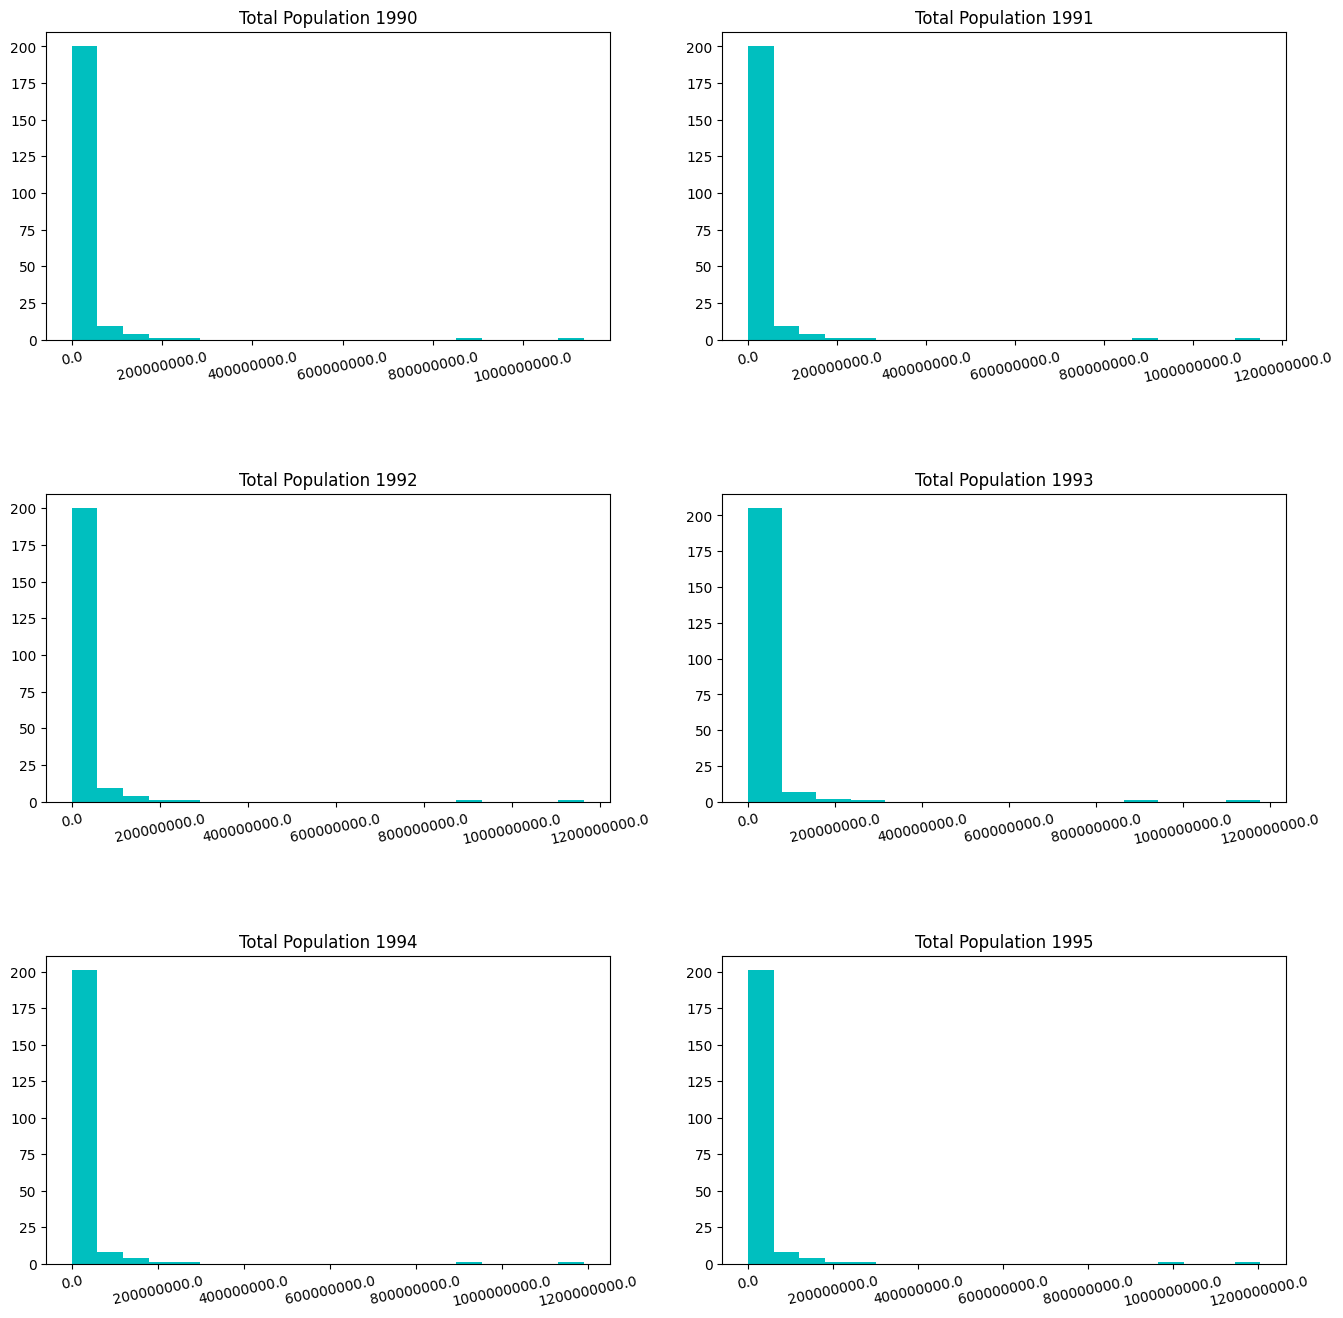

In [19]:
# Create the plot object
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 16) )

# First subplot 
ax[0,0].hist(df.population_1990, bins=20, color='c')
ax[0,0].set_title("Total Population 1990")
ax[0,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[0,0].ticklabel_format(style='plain', axis='y')
ax[0,0].ticklabel_format(style='plain', axis='x')
ax[0,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# Second subplot 
ax[0,1].hist(df.population_1991, bins=20, color='c')
ax[0,1].set_title("Total Population 1991")
ax[0,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[0,1].ticklabel_format(style='plain', axis='y')
ax[0,1].ticklabel_format(style='plain', axis='x')
ax[0,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# Third subplot
ax[1,0].hist(df.population_1992, bins=20, color='c')
ax[1,0].set_title("Total Population 1992")
ax[1,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[1,0].ticklabel_format(style='plain', axis='y')
ax[1,0].ticklabel_format(style='plain', axis='x')
ax[1,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# Fourth subplot
ax[1,1].hist(df.population_1993, bins=15, color='c')
ax[1,1].set_title("Total Population 1993")
ax[1,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[1,1].ticklabel_format(style='plain', axis='y')
ax[1,1].ticklabel_format(style='plain', axis='x')
ax[1,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# 5
ax[2,0].hist(df.population_1994, bins=20, color='c')
ax[2,0].set_title("Total Population 1994")
ax[2,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[2,0].ticklabel_format(style='plain', axis='y')
ax[2,0].ticklabel_format(style='plain', axis='x')
ax[2,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# 6 
ax[2,1].hist(df.population_1995, bins=20, color='c')
ax[2,1].set_title("Total Population 1995")
ax[2,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[2,1].ticklabel_format(style='plain', axis='y')
ax[2,1].ticklabel_format(style='plain', axis='x')
ax[2,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

fig.subplots_adjust(hspace=0.5)

# Show the graphs
plt.show()

What we can see in these graphs is a right-skewed distribution that represents the world population by countries in the early 1990s. We have at least two massive registers of around 1 billion people, a few countries with less than 300 million, and most of them below 50 million.

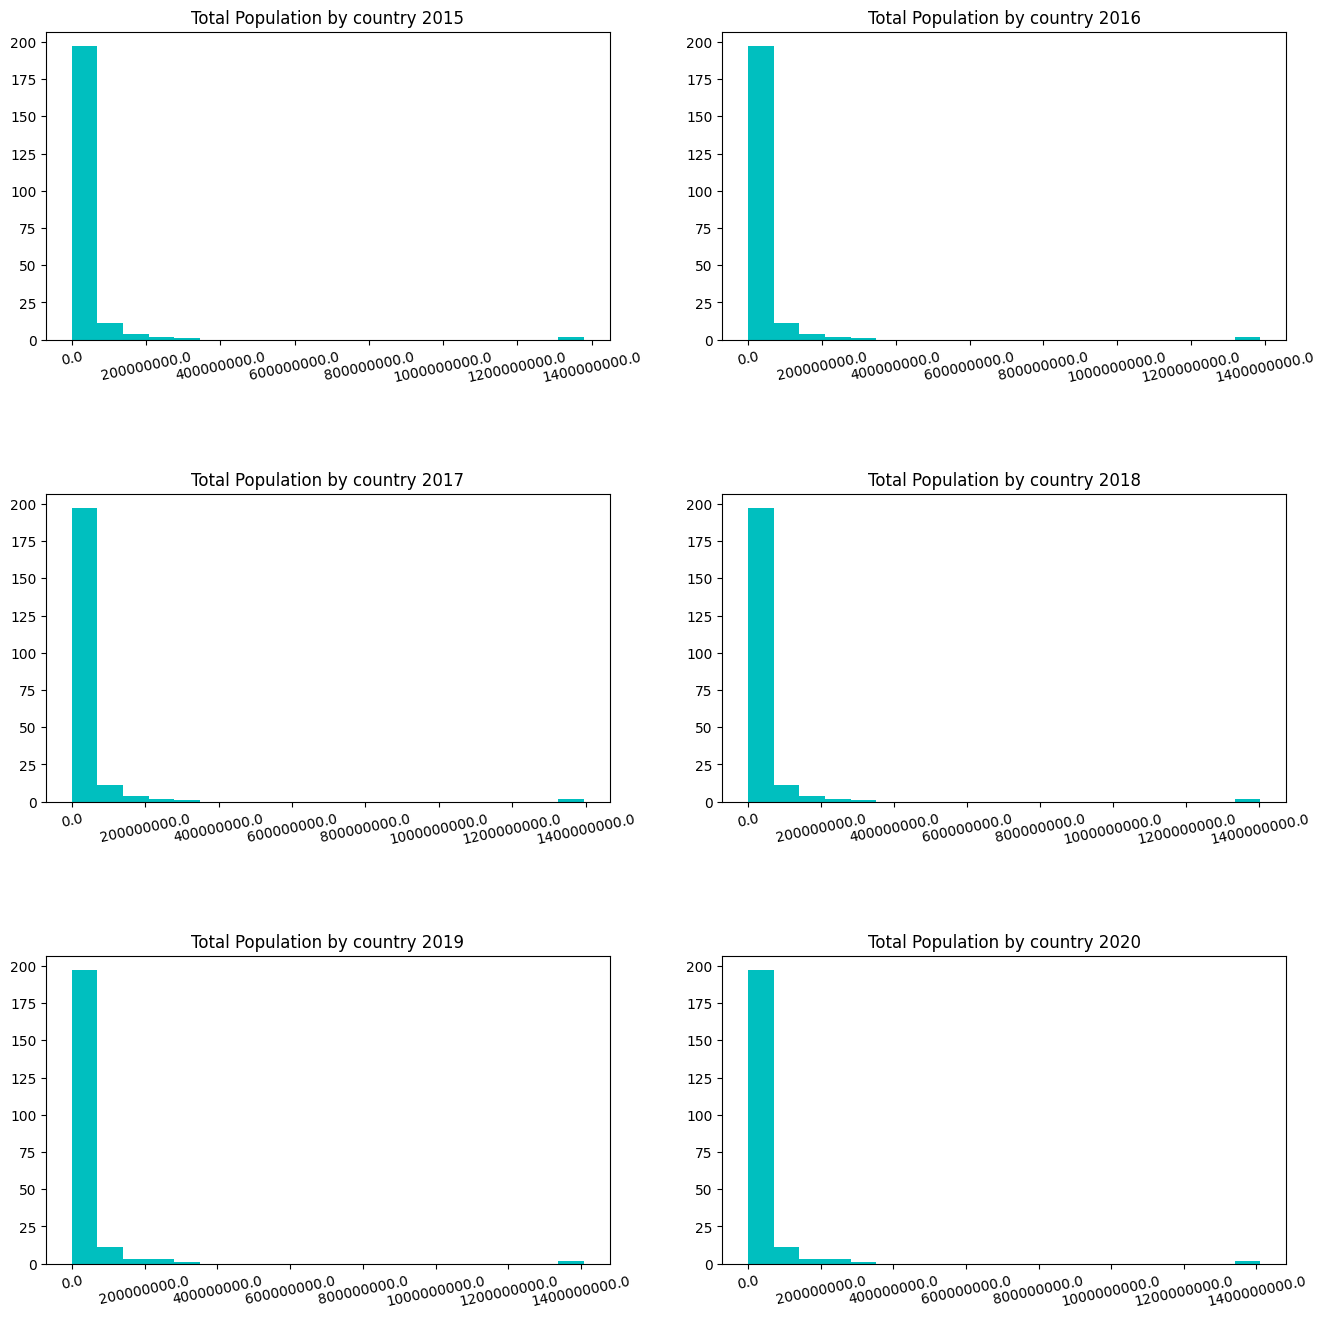

In [22]:
# # Create the plot object
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 16) )

ax[0,0].hist(df.population_2015, bins=20, color='c')
ax[0,0].set_title("Total Population by country 2015")
ax[0,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[0,0].ticklabel_format(style='plain', axis='y')
ax[0,0].ticklabel_format(style='plain', axis='x')
ax[0,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# 6 
ax[0,1].hist(df.population_2016, bins=20, color='c')
ax[0,1].set_title("Total Population by country 2016")
ax[0,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[0,1].ticklabel_format(style='plain', axis='y')
ax[0,1].ticklabel_format(style='plain', axis='x')
ax[0,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

ax[1,0].hist(df.population_2017, bins=20, color='c')
ax[1,0].set_title("Total Population by country 2017")
ax[1,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[1,0].ticklabel_format(style='plain', axis='y')
ax[1,0].ticklabel_format(style='plain', axis='x')
ax[1,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)


ax[1,1].hist(df.population_2018, bins=20, color='c')
ax[1,1].set_title("Total Population by country 2018")
ax[1,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[1,1].ticklabel_format(style='plain', axis='y')
ax[1,1].ticklabel_format(style='plain', axis='x')
ax[1,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

ax[2,0].hist(df.population_2019, bins=20, color='c')
ax[2,0].set_title("Total Population by country 2019")
ax[2,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[2,0].ticklabel_format(style='plain', axis='y')
ax[2,0].ticklabel_format(style='plain', axis='x')
ax[2,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)


ax[2,1].hist(df.population_2020, bins=20, color='c')
ax[2,1].set_title("Total Population by country 2020")
ax[2,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[2,1].ticklabel_format(style='plain', axis='y')
ax[2,1].ticklabel_format(style='plain', axis='x')
ax[2,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)


# Adjust vertical space between subplots
fig.subplots_adjust(hspace=0.5)

# Show the graphs
plt.show()

We can observe the same distribution as before, but with higher magnitudes. Respect to the graphs of the 1990s, We can't appreciate great changes, except that the first bin is a bit lower than the 1990s ones. That could be due to the acceleration of population growth in some countries. For that reason, in these distribution graphs those countries would be moving to the right.

### Boxplots

Text(0, 0.5, 'total')

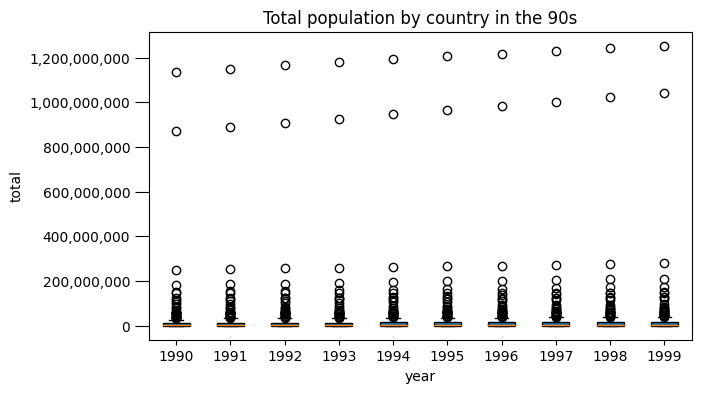

In [23]:
fig, ax = plt.subplots(figsize = (7,4))
bp1 = ax.boxplot([df.population_1990, df.population_1991, df.population_1992, df.population_1993,
                 df.population_1994, df.population_1995, df.population_1996, df.population_1997,
                  df.population_1998, df.population_1999], patch_artist=True,
                 labels=['1990','1991', '1992', '1993', '1994','1995','1996', '1997', '1998', '1999'])

ax.yaxis.set_tick_params(tickdir='out', length=10)
ax.yaxis.set_ticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])

plt.title("Total population by country in the 90s")
plt.xlabel("year")
plt.ylabel("total")

Text(0, 0.5, 'total')

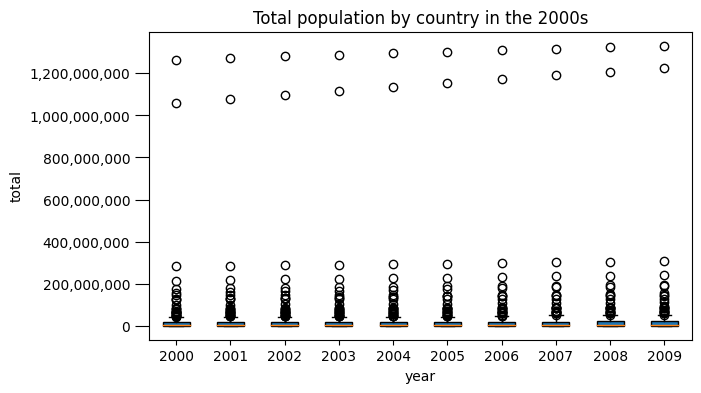

In [25]:
fig, ax = plt.subplots(figsize = (7,4))
bp1 = ax.boxplot([df.population_2000, df.population_2001, df.population_2002, df.population_2003,
                 df.population_2004, df.population_2005, df.population_2006, df.population_2007,
                  df.population_2008, df.population_2009], patch_artist=True,
                 labels=['2000','2001', '2002', '2003', '2004','2005','2006', '2007', '2008', '2009'])

ax.yaxis.set_tick_params(tickdir='out', length=10)
ax.yaxis.set_ticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])

plt.title("Total population by country in the 2000s")
plt.xlabel("year")
plt.ylabel("total")

Text(0, 0.5, 'total')

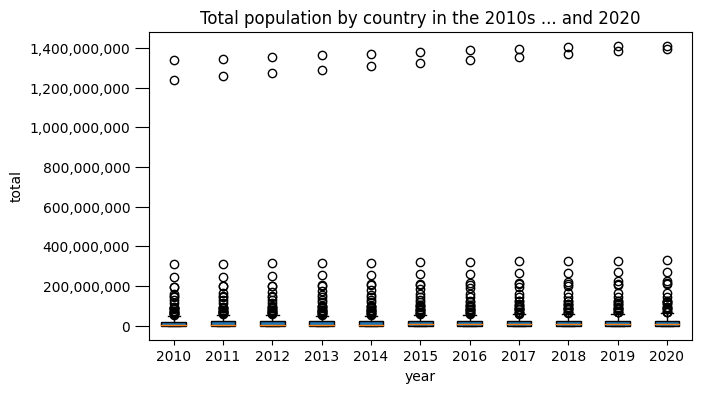

In [26]:
fig, ax = plt.subplots(figsize = (7,4))
bp1 = ax.boxplot([df.population_2010, df.population_2011, df.population_2012, df.population_2013,
                 df.population_2014, df.population_2015, df.population_2016, df.population_2017,
                  df.population_2018, df.population_2019,df.population_2020], patch_artist=True,
                 labels=['2010','2011', '2012', '2013', '2014','2015','2016', '2017', '2018', '2019', '2020'])

ax.yaxis.set_tick_params(tickdir='out', length=10)
ax.yaxis.set_ticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])

plt.title("Total population by country in the 2010s ... and 2020")
plt.xlabel("year")
plt.ylabel("total")

This set of boxplots confirms what we glimpse before. Here we can see the two big players at the very top, with massive populations, also it seems that the second one is growing at a faster pace than the "leader". The rest of the countries remain far behind. A deeper analysis is mandatory to reveal the information hidden in these plots.

# Countries with the higher population

In [29]:
filtered = df.sort_values(by=['population_2020'], ascending = False).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.population_2020.tolist()

### Late 2010s and 2020

In [ ]:
filtered = df.sort_values(by=['population_2018'], ascending = False).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.population_2019.tolist()

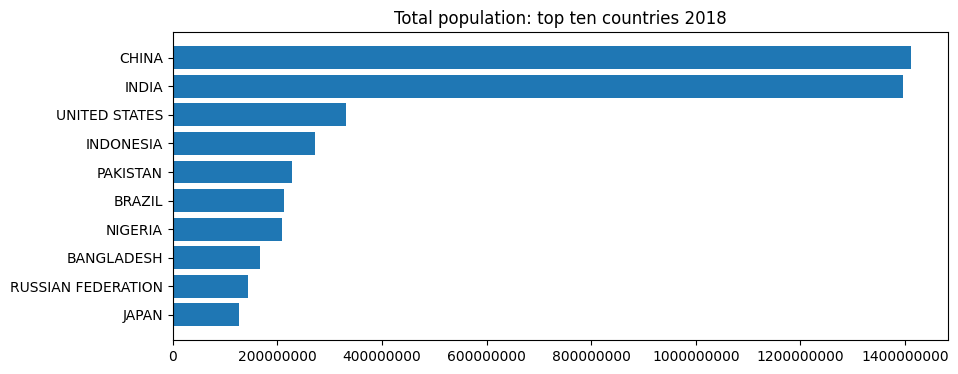

In [36]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8,9]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize= (10,4))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# Invert the y axis
ax.invert_yaxis()

# supress the scientific notation
ax.ticklabel_format(style='plain', axis='x')

# title
plt.title("Total population: top ten countries 2018")
# plot
plt.show()

In [37]:
filtered = df.sort_values(by=['population_2019'], ascending = False).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.population_2019.tolist()

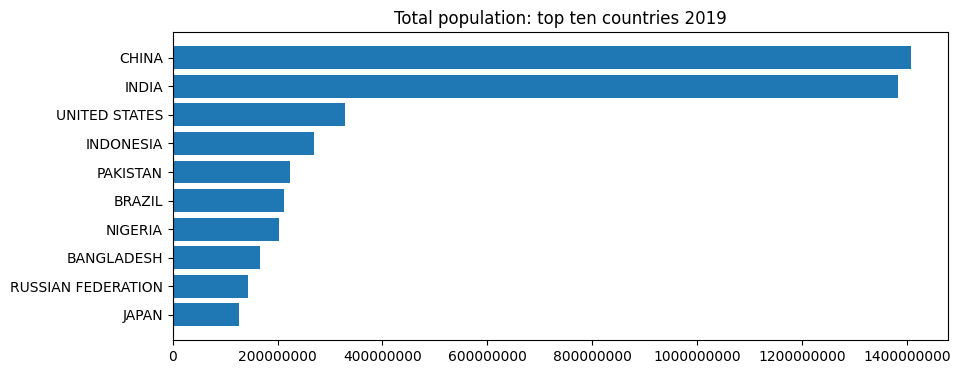

In [39]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8,9]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize= (10,4))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# Invert the y axis
ax.invert_yaxis()

# supress the scientific notation
ax.ticklabel_format(style='plain', axis='x')

# title
plt.title("Total population: top ten countries 2019")
# plot
plt.show()

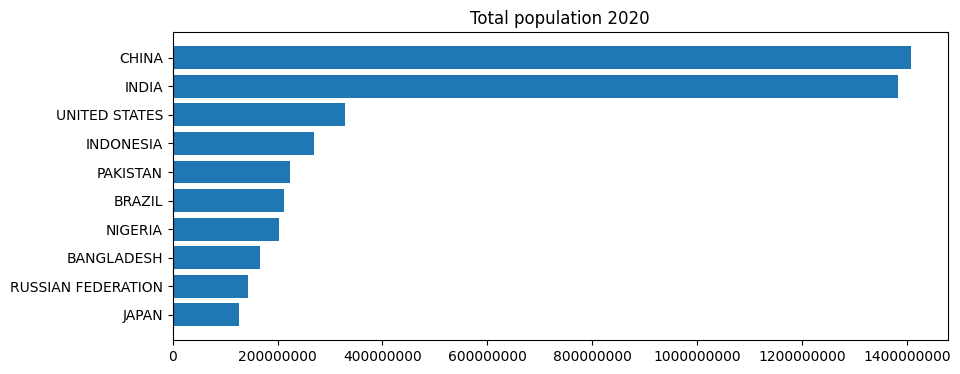

In [40]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8,9]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize= (10,4))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# Invert the y axis
ax.invert_yaxis()
# supress the scientific notation
ax.ticklabel_format(style='plain', axis='x')
# title
plt.title("Total population 2020")

# plot
plt.show()